## Jupyter project using various Python APIs
#### *ft. Twitter, Google NLP, Wordcloud*
* **수업 목표: 다양한 API를 경험하여 원하는 기능을 프로젝트와 결합할 수 있는 실력을 갖춘다.**
  1. Tweepy를 이용해 입력된 키워드 기준으로 트위터 내용을 크롤링할 수 있다.
  2. Google Natural Language API를 이용해 문장을 입력했을 때 긍정적/부정적인지 감정분석을 할 수 있다.
  3. Wordcloud 모듈을 이용해 입력된 문자열을 쪼개고 빈도수에 비례한 크기로 시각화할 수 있다.
* ***What is API?***
  * *Application Programming Interface, 응용 프로그램 프로그래밍 인터페이스는 응용 프로그램에서 사용할 수 있도록,<br> 운영 체제나 프로그래밍 언어가 제공하는 기능을 제어할 수 있게 만든 인터페이스를 뜻한다.*
  * ex) Matrix multiplication using `numpy` API

In [1]:
A = [[1, 2, 3], [4, 5, 6]]
B = [[2, 4], [8, 10], [14, 16]]

In [2]:
if len(A[0]) != len(B):
    raise Exception()
[[sum(a*b for a, b in zip(rowA, colB)) for colB in zip(*B)] for rowA in A]

[[60, 72], [132, 162]]

In [3]:
import numpy as np
np.matmul(A, B)

array([[ 60,  72],
       [132, 162]])

* ***Why using APIs?***
  * API를 사용하면 우리가 제어 하고자 하는 시스템의 환경을 정확히 알지 못하더라도 손 쉽게 제어가 가능하다.
  * UI가 사용자와 시스템의 인터페이스 였다면 API는 시스템과 시스템간의 인터페이스라고 할 수 있다.

![](https://swisscognitive.ch/wp/wp-content/uploads/2020/11/what-is-artificial-intelligence.png)

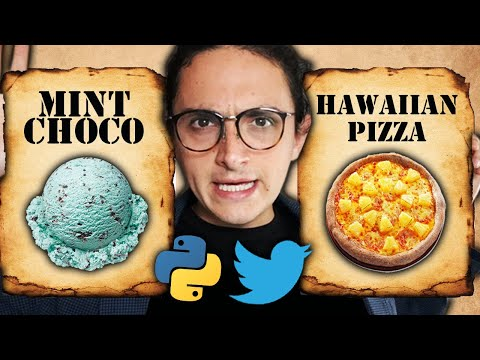

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('QTgRNer2epE', width=800, height=450)

### Twitter API
* Get Access Token
  1. [apps.twitter.com](https://apps.twitter.com)
  2. Create an App > Fill an application
  > *Hello? I'm Sangjun, Son, a student from Seoul National University. While doing TA works, I thought it would be great opportunities for students to experience various python features. I'll teach positive/negative sentiment analysis using keywords from twitter data (tweepy).*
  3. Projects & Apps > Generate Access token & secret
    * *API key, API secret key, Access token, Access token secret*

In [ ]:
!pip install tweepy

In [5]:
import tweepy

consumer_key = "???"
consumer_secret = "???"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

access_token = "???"
access_token_secret = "???"
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [6]:
keyword = "민트초코"
cursor = tweepy.Cursor(api.search, q=keyword, since='2020-01-01', count=100, include_entities=True)
for i, tweet in enumerate(cursor.items()):
    print("{}: {}".format(i, tweet.text))

0: 민트초코 아몬드 먹어봄
1: 민트초코.. 그래 먹을수있지 그렇다치자.
근데 뭐? 민트치킨? 민트커피? 민트밥을 민트김치에 싸서 민트김과 같이 드셔보세요 개씨발아
2: 동생이 민트초코 마카롱을 울부짖어서 사러 나갔다 오려했는데 차가 방전됐다...😂😂😂 에잇 똥차...!! 사람은 내일 부르기로 해서 나랑 동생 둘 다 손가락만 빠는 중이다. 배달은 뭔가 안내켜. 눈으로 보고… https://t.co/LgWz9XVuxS
3: RT @llapiuyuuuuu: "업계 관계자들은 “민트초코가 일부 마니아만이 선호하는 맛이란 주장은 사실과 다르다”고 말한다.“민트 초콜릿 칩 아이스크림은 작년 11월부터 올 11월 말까지 1년간의 누적 판매량 2위를 기록했다." 이럴수가
4: 모두의 익명 질문을 모집 중!

최근 답변한 질문
● 민트초코vs녹차초코…
● 구운 파인애플  vs 구운 …
#질문상자 #익명질문모집중

https://t.co/PUodtZvWLf
5: RT @May_be_jb: 잘생긴얼굴로 갱장히 진지하게 민트초코사람들을 대표해서 반민초파를 향해 취향존중해 주시기를 진정성을 담아 완곡하게 말하고 계신 우리 민초대장님ㅠㅠ 근데 진지하신 와중에 죄송하지만 까맣고 짧뚱한 손톱이 너무 귀여워요...ㅠㅠㅠ…
6: RT @May_be_jb: 잘생긴얼굴로 갱장히 진지하게 민트초코사람들을 대표해서 반민초파를 향해 취향존중해 주시기를 진정성을 담아 완곡하게 말하고 계신 우리 민초대장님ㅠㅠ 근데 진지하신 와중에 죄송하지만 까맣고 짧뚱한 손톱이 너무 귀여워요...ㅠㅠㅠ…
7: @mexxygoround 그런 걸 질문이라고. 당연히 너지. 계속 말하는데 민트 초코는 없어도 돼, 너만 있으면 충분해.
8: RT @May_be_jb: 잘생긴얼굴로 갱장히 진지하게 민트초코사람들을 대표해서 반민초파를 향해 취향존중해 주시기를 진정성을 담아 완곡하게 말하고 계신 우리 민초대장님ㅠㅠ 근데 진지하신 와중에 죄송하지만 까맣고 짧뚱한 손톱이 너무 귀여워요...ㅠㅠㅠ…
9: RT @beingsince: 

KeyboardInterrupt: 

### Google Natural Language API
* [Documentation](https://cloud.google.com/natural-language/docs/quickstarts)
* [console.cloud.google.com](https://console.cloud.google.com)
  * API Library > Cloud Natural Language API > 사용
  * 사용자 인증 정보 만들기 > [API 키](https://console.cloud.google.com/apis/credentials/serviceaccountkey?_ga=2.149612351.88419587.1606806283-1529152370.1593052341) (json)
* Google Cloud Installation
  * `pip install --upgrade google-cloud-language`

In [ ]:
!pip install --upgrade google-cloud-language

In [7]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="???"

In [8]:
# Imports the Google Cloud client library
from google.cloud import language_v1

# Instantiates a client
client = language_v1.LanguageServiceClient()

# The text to analyze
text = "컴개실 실습은 행복 그 자체다. 매일 설렌다. 재밌다. 즐겁다."
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)

# Detects the sentiment of the text
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print(sentiment)

Text: 컴개실 실습은 행복 그 자체다. 매일 설렌다. 재밌다. 즐겁다.
magnitude: 1.5
score: 0.30000001192092896



### Word Cloud
* `pip install wordcloud`
* Add font style *font.ttf* in the same directory

In [ ]:
!pip install wordcloud

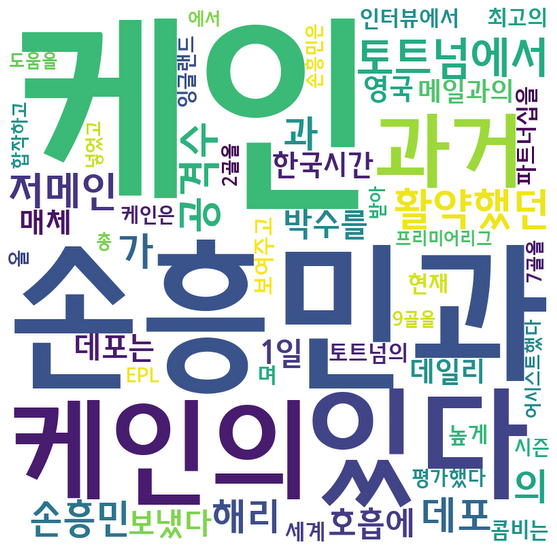

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = '과거 토트넘에서 활약했던 공격수 저메인 데포(38)가 손흥민(28)과 해리 케인(27)의 호흡에 박수를 보냈다. 데포는 1일(한국시간) 영국 매체 데일리 메일과의 인터뷰에서 "토트넘의 손흥민과 케인 콤비는 현재 세계 최고의 파트너십을 보여주고 있다"며 높게 평가했다. 올 시즌 손흥민과 케인은 잉글랜드 프리미어리그(EPL)에서 총 9골을 합작하고 있다. 손흥민은 케인의 도움을 받아 7골을 넣었고, 케인의 2골을 어시스트했다.'
wordcloud = WordCloud(font_path='./font.ttf', background_color='white', width = 800, height = 800).generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.show()


### *Make Your Own Project*

### *Reference*
* [Why using APIs?](https://velog.io/@won-developer/API-%EB%9E%80)
* [Twitter Sentiment Analysis with Machine Learning](https://monkeylearn.com/blog/sentiment-analysis-of-twitter/)
* [Tweepy Usage](https://kslee7746.tistory.com/entry/python-tweepy-%EC%82%AC%EC%9A%A9%ED%95%9C-%ED%8A%B8%EC%9C%84%ED%84%B0-%ED%81%AC%EB%A1%A4%EB%A7%81crawling)